## Code to Chapter 6 of LangChain for Life Science and Healthcare book, by Dr. Ivan Reznikov

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1sDkTWOI1QUR_V2QWW6rYAqI89OHFj7gt?usp=sharing)

## RDKit Demo Part 1b - Cactus Integration

## Overview
This notebook explores the Cactus library as an alternative AI-powered cheminformatics solution. Building upon our previous exploration with ChemCrow, we'll now investigate how Cactus handles chemical reasoning tasks and compare its capabilities for molecular analysis.

### Learning Objectives
By the end of this notebook, you will understand:
1. How to set up and use the Cactus library for chemical queries
2. The differences between Cactus and ChemCrow approaches
3. Cactus's strengths and limitations in chemical reasoning
4. How to evaluate AI cheminformatics tools for your specific needs
5. Best practices for integrating multiple chemical AI solutions

We will address the following queries:

1. **Determining Molecular Formula**: We start by examining the provided SMILES notation and use RDKit to calculate its molecular formula. The question at hand is, "What is the formula of this compound?"

2. **Calculate Molecular Weight**: We'll need to calculate the exact molecular weight of the molecule.

3. **Generating a 2D Representation**: RDKit allows us to visualize chemical structures in two dimensions. We will employ RDKit to create a 2D representation of the given SMILES notation and complete the query, "Can you draw a 2D representation of this compound?"

4. **Creating a 3D Visualization**: Taking it a step further, we utilize RDKit to generate a 3D representation of the molecule described by the SMILES notation. We will answer the query, "Can you provide a 3D visualization of this compound?"

To accomplish these tasks, we will employ various techniques and resources:

We've already tested **Strategy 1 with ChemCrow** (link to the Colab below)

**Strategy 2: `cactus` Library**: We'll make use of the cactus library, a Generative AI cheminformatics python package.

By the end of this notebook, we aim to have a fully functional Langchain application with RDKit integrations that can answer chemical-related queries with ease.

***Disclaimer:** Notebook results may vary slightly with each execution.*

## Environment Setup

### Installing Cactus
Cactus is installed directly from its GitHub repository, which means we get the latest
development version with all recent improvements and bug fixes.

**Important**: Installing from Git ensures we have access to the most current features,
but may occasionally include experimental functionality.

In [1]:
!pip install -q git+https://github.com/pnnl/cactus.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
!pip freeze | grep "cactus\|lang\|openai\|rdkit\|numpy"

cactus-llm @ git+https://github.com/pnnl/cactus.git@6a4f9b04e43a8e8cc8cb34e5e10effdb55eb4626
google-ai-generativelanguage==0.6.18
google-cloud-language==2.17.2
langchain==0.3.26
langchain-anthropic==0.3.17
langchain-community==0.3.27
langchain-core==0.3.69
langchain-google-genai==2.1.8
langchain-openai==0.3.28
langchain-text-splitters==0.3.8
langcodes==3.5.0
langsmith==0.4.6
language_data==1.3.0
libclang==18.1.1
numpy==1.26.4
openai==1.96.1
rdkit==2025.3.3


In [3]:
import logging

logging.getLogger().setLevel(logging.CRITICAL)

In [4]:
from google.colab import userdata
import os

os.environ["OPENAI_API_KEY"] = userdata.get("LC4LS_OPENAI_API_KEY")

## Test Compound and Query Setup

### Target Molecule: Aspirin
We'll use aspirin (acetylsalicylic acid) as our test compound:
- **SMILES notation**: `CC(=O)OC1=CC=CC=C1C(=O)O`
- **Common name**: Aspirin
- **IUPAC name**: 2-(acetyloxy)benzoic acid
- **Molecular formula**: C₉H₈O₄
- **Molecular weight**: 180.16 g/mol

### Why This Compound?
Aspirin is an excellent test case because:
1. It's a well-known pharmaceutical compound
2. Has a moderate complexity suitable for testing
3. Contains multiple functional groups (ester, carboxylic acid, aromatic ring)
4. Results can be easily verified against known databases

In [5]:
# Queries
smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
query_1 = f"What is the formula of {smiles}?"
query_2 = f"What is the molecular mass of {smiles}"
query_3 = f"Draw 2D representation of {smiles}?"
query_4 = f"Draw 3D representation of {smiles}?"

In [6]:
results = {f"query_{q+1}": {} for q in range(4)}

### Reference:
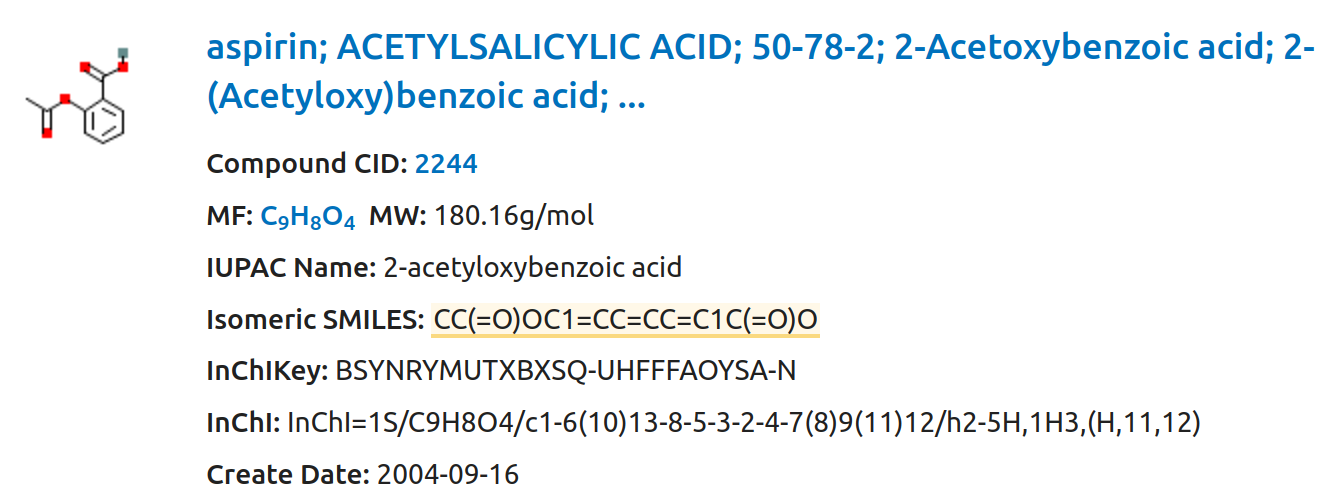

For verification purposes, you can check the compound details at:
[PubChem Entry for Aspirin](https://pubchem.ncbi.nlm.nih.gov/#query=CC(%3DO)OC1%3DCC%3DCC%3DC1C(%3DO)O)


## Strategy 2. `cactus`
### What is Cactus?
Cactus is an AI-powered cheminformatics package developed by Pacific Northwest National Laboratory (PNNL). It represents a different approach to combining LLMs with chemical reasoning:

**Key Characteristics:**
- **Research-Focused**: Developed by a national laboratory for scientific applications
- **LangChain Integration**: Built on modern AI agent frameworks
- **Chemical Tool Integration**: Combines RDKit with database access
- **API-First Design**: Emphasis on programmatic access and integration

### Architecture Differences from ChemCrow
| Aspect | ChemCrow | Cactus |
|--------|----------|--------|
| **Origin** | Academic/Open Source | National Laboratory |
| **Focus** | General Chemistry Education | Research Applications |
| **Model Support** | Multiple OpenAI Models | Currently GPT-3.5-turbo |
| **Customization** | Limited | Research-oriented flexibility |
| **Installation** | PyPI Package | GitHub Direct Install |

### Repository Information
- **GitHub**: https://github.com/pnnl/cactus
- **Maintenance**: Maintained by PNNL researchers
- **License**: Open source for research and educational use

### Important Note on Installation
<font color='red'>If you encounter the error "numpy.dtype size changed, may indicate binary incompatibility",
restart the session and re-run all cells. This is a known compatibility issue between
different numpy versions and compiled extensions</font>

In [7]:
from cactus.agent import Cactus

chem_model = Cactus(model_name="gpt-3.5-turbo", model_type="api")

<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.


Expected Results:
- **Molecular Formula**: C₉H₈O₄
- **Molecular Weight**: ~180.16 g/mol
- **Structure**: Contains acetyl ester and carboxylic acid functional groups

In [8]:
results["query_1"]["cactus_a"] = chem_model.run(query_1)
results["query_1"]["cactus_a"]

/usr/local/lib/python3.11/dist-packages/cactus/agent/cactus.py:132: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  outputs = self.agent_executor({"input": prompt, "tool_names": tool_names})




> Entering new AgentExecutor chain...
Thought: I need to use the tool CalculateMolecularWeight
Action: CalculateMolecularWeight
Action Input: CC(=O)OC1=CC=CC=C1C(=O)O
Observation: 180.042258736
Thought:I now know the final answer
Final Answer: The molecular weight of CC(=O)OC1=CC=CC=C1C(=O)O is 180.042 Da

> Finished chain.


'The molecular weight of CC(=O)OC1=CC=CC=C1C(=O)O is 180.042 Da'

In [9]:
results["query_2"]["cactus_a"] = chem_model.run(query_2)
results["query_2"]["cactus_a"]



> Entering new AgentExecutor chain...
Thought: I need to use the tool CalculateMolecularWeight
Action: CalculateMolecularWeight
Action Input: CC(=O)OC1=CC=CC=C1C(=O)O
Observation: 180.042258736
Thought:I now know the final answer
Final Answer: The molecular weight of CC(=O)OC1=CC=CC=C1C(=O)O is 180.042 Dalton

> Finished chain.


'The molecular weight of CC(=O)OC1=CC=CC=C1C(=O)O is 180.042 Dalton'

In [10]:
results["query_3"]["cactus_a"] = chem_model.run(query_3)
results["query_3"]["cactus_a"]



> Entering new AgentExecutor chain...
Thought: I need to use a tool to generate a 2D representation of the molecule.
Action: DrawStructure
Action Input: CC(=O)OC1=CC=CC=C1C(=O)O
Observation: DrawStructure is not a valid tool, try one of [CalculateMolecularWeight, CalculateQED, BrenkFilter, CalculateTPSA, CalculateBBBPermeant, calculate_druglikeness, calculate_gi_absorption, CalculateLogP, PainsFilter, CalculateSA].
Thought:I need to use a different tool to answer this question.
Observation: Invalid Format: Missing 'Action:' after 'Thought:
Thought:I need to use a different tool to answer this question.
Final Answer: I cannot provide a 2D representation of the molecule.

> Finished chain.


'I cannot provide a 2D representation of the molecule.'

In [11]:
results["query_4"]["cactus_a"] = chem_model.run(query_4)
results["query_4"]["cactus_a"]



> Entering new AgentExecutor chain...
Thought: I need to use a tool to generate a 3D representation of the SMILES string provided.
Action: N/A
Action Input: CC(=O)OC1=CC=CC=C1C(=O)O
Observation: N/A is not a valid tool, try one of [CalculateMolecularWeight, CalculateQED, BrenkFilter, CalculateTPSA, CalculateBBBPermeant, calculate_druglikeness, calculate_gi_absorption, CalculateLogP, PainsFilter, CalculateSA].
Thought:I cannot generate a 3D representation of the SMILES string provided.
Observation: Invalid Format: Missing 'Action:' after 'Thought:
Thought:I need to use a tool to generate a 3D representation of the SMILES string provided.
Action: N/A
Action Input: CC(=O)OC1=CC=CC=C1C(=O)O
Observation: N/A is not a valid tool, try one of [CalculateMolecularWeight, CalculateQED, BrenkFilter, CalculateTPSA, CalculateBBBPermeant, calculate_druglikeness, calculate_gi_absorption, CalculateLogP, PainsFilter, CalculateSA].
Thought:I cannot generate a 3D representation of the SMILES string prov

'I cannot generate a 3D representation of CC(=O)OC1=CC=CC=C1C(=O)O.'

As you can see, the results aren't optimistic, as all of them ended up calculating molecular weight

In [12]:
import json

with open("results_cactus.json", "w") as f:
    json.dump(results, f)

Part 1a with ChemCrow:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1j-GUmHdYNaAeKBZbbnF-yXg9dksIyirS?usp=sharing)

Part 1b with Cactus (current):

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1sDkTWOI1QUR_V2QWW6rYAqI89OHFj7gt?usp=sharing)

Part 1c with LLM4Chem/LlaSMol-Llama2-7B:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1oLp9dwqxj6wpGnfuuhphp_v7U2Bn3-RM?usp=sharing?usp=sharing)

Part 2 with LangChain Agents:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1CIIZ4cGrO7hX1tvby3K-nr4A5qUMaO7P?usp=sharing)